In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Data

In [40]:
data = pd.read_csv('data.csv')
data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


### Cleaning Data

In [43]:
data = data.rename(columns={'ISO 3166-1 alpha-3':'ISO'})
data = data[data['Total'] > 0].reset_index(drop=True)
data

,Country,ISO,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1949,0.014656,0.014656,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.000000,0.000000,0.000000,NaN,0.011266
2,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.000000,0.000000,0.000000,NaN,0.012098
3,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.000000,0.000000,0.000000,NaN,0.011946
4,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.000000,0.000000,0.000000,NaN,0.013685
...,...,...,...,...,...,...,...,...,...,...,...
21692,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
21693,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
21694,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
21695,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


### Seperate Country Data From Global

In [142]:
countries = data[data['Country'].isin(['Global', 'International Transport']) == False]
intl =  data[data['Country'].isin(['Global', 'International Transport']) == True]
countries

,Country,ISO,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1949,0.014656,0.014656,0.000000,0.0,0.000000,0.0,NaN,NaN
1,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.0,0.000000,0.0,NaN,0.011266
2,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.0,0.000000,0.0,NaN,0.012098
3,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.0,0.000000,0.0,NaN,0.011946
4,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.0,0.000000,0.0,NaN,0.013685
...,...,...,...,...,...,...,...,...,...,...,...
21348,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.0,0.468867,0.0,NaN,0.650533
21349,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.0,0.557990,0.0,NaN,0.783639
21350,Zimbabwe,ZWE,2019,11.114607,6.888320,3.656672,0.0,0.569615,0.0,NaN,0.723861
21351,Zimbabwe,ZWE,2020,10.607897,6.721571,3.316712,0.0,0.569615,0.0,NaN,0.676970


### Calculate Total and Per Capita CO2 Emissions Across All Years

In [66]:
total = countries.groupby('Country')['Total'].sum()
total = total.sort_values(ascending=False).to_frame()
total.head(10).style.set_caption('Top 10 Countries With the Most CO2 Emissions since 1750')

,Total
Country,
USA,421906.855203
China,249352.817660
Russia,117547.631435
Germany,93290.503809
United Kingdom,78508.720102
Japan,66711.083302
India,57105.388563
France,39105.764962
Canada,34115.395331


In [67]:
total.tail(10).style.set_caption('Top 10 Countries With the Least CO2 Emissions since 1750')

,Total
Country,
Montserrat,1.607640
Christmas Island,1.330032
Wallis and Futuna Islands,0.773031
St. Kitts-Nevis-Anguilla,0.622880
Saint Helena,0.400026
Niue,0.301987
Tuvalu,0.286818
Puerto Rico,0.208848
Leeward Islands,0.179536


In [74]:
per_cap = countries.groupby('Country')['Per Capita'].sum().sort_values(ascending=False).to_frame()
per_cap.head(10).style.set_caption('Top 10 Countries With the Most CO2 Emissions Per Capita since 1750')

,Per Capita
Country,
Sint Maarten (Dutch part),11574.339869
Curaçao,3630.368451
Qatar,3265.913622
USA,2252.097216
Luxembourg,1984.154907
United Arab Emirates,1804.258983
Kuwait,1717.791052
United Kingdom,1645.530351
Belgium,1477.017260


### What Is The Leading Cause of Emissions for Each Country?

In [141]:
causes = countries.iloc[:,4:9]
causes.max(axis=1)

0        0.014656
1        0.063204
2        0.065952
3        0.059892
4        0.068307
           ...   
21348    5.900452
21349    7.177776
21350    6.888320
21351    6.721571
21352    7.225620
Length: 21353, dtype: float64

In [143]:
countries.insert(11, 'Leading Cause', causes.idxmax(axis=1))
countries

,Country,ISO,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Leading Cause
0,Afghanistan,AFG,1949,0.014656,0.014656,0.000000,0.0,0.000000,0.0,NaN,NaN,Coal
1,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.0,0.000000,0.0,NaN,0.011266,Oil
2,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.0,0.000000,0.0,NaN,0.012098,Oil
3,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.0,0.000000,0.0,NaN,0.011946,Oil
4,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.0,0.000000,0.0,NaN,0.013685,Oil
...,...,...,...,...,...,...,...,...,...,...,...,...
21348,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.0,0.468867,0.0,NaN,0.650533,Coal
21349,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.0,0.557990,0.0,NaN,0.783639,Coal
21350,Zimbabwe,ZWE,2019,11.114607,6.888320,3.656672,0.0,0.569615,0.0,NaN,0.723861,Coal
21351,Zimbabwe,ZWE,2020,10.607897,6.721571,3.316712,0.0,0.569615,0.0,NaN,0.676970,Coal


In [157]:
LeadingCauseOverall = countries.groupby('Country')['Leading Cause'].agg(pd.Series.mode)


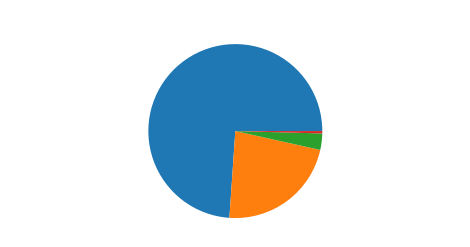

In [138]:
LeadingCauseOverall.sum()
plt.pie(LeadingCauseOverall.value_counts(), labels=['Oil', 'Coal', 'Gas', 'Flaring'], autopct='%1.1f%%', pctdistance=1.2, labeldistance = 1.4, textprops={'color':"w"})
plt.title('Breakdown of Leading Causes for CO2 Emissions Globally (Pct of Countries)', color='w')
plt.show()

### Plot CO2 Emissions for the US

In [149]:
usa = countries[countries['Country'] == 'USA']
usa

,Country,ISO,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Leading Cause
20275,USA,USA,1800,0.252816,0.252816,0.000000,0.000000,NaN,0.000000,NaN,NaN,Coal
20276,USA,USA,1801,0.267472,0.267472,0.000000,0.000000,NaN,0.000000,NaN,NaN,Coal
20277,USA,USA,1802,0.289456,0.289456,0.000000,0.000000,NaN,0.000000,NaN,NaN,Coal
20278,USA,USA,1803,0.296784,0.296784,0.000000,0.000000,NaN,0.000000,NaN,NaN,Coal
20279,USA,USA,1804,0.333424,0.333424,0.000000,0.000000,NaN,0.000000,NaN,NaN,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...
20492,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777,Oil
20493,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923,Oil
20494,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884,Oil
20495,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218,Oil


In [171]:
X = usa['Year'].values
total = usa['Total'].values
coal = usa['Coal'].values
gas = usa['Gas'].values
cement = usa['Cement'].values
flaring = usa['Flaring'].values
other = usa['Other'].values

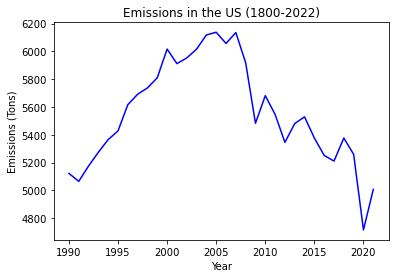

In [173]:
plt.plot(X[-32:], total[-32:], color='b', label='Total')
plt.xlabel('Year')
plt.ylabel('Emissions (Tons)')
plt.title('Emissions in the US (1800-2022)')
plt.show()

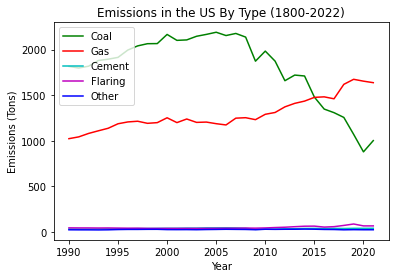

In [174]:

plt.plot(X[-32:], coal[-32:], color='g', label='Coal')
plt.plot(X[-32:], gas[-32:], color='r', label='Gas')
plt.plot(X[-32:], cement[-32:], color='c', label='Cement')
plt.plot(X[-32:], flaring[-32:], color='m', label='Flaring')
plt.plot(X[-32:], other[-32:], color='b', label='Other')
plt.xlabel('Year')
plt.ylabel('Emissions (Tons)')
plt.title('Emissions in the US By Type (1800-2022)')
plt.legend()
plt.show()